In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tqdm.notebook import tqdm

In [2]:
#値を-1から1に正規化する関数
def normalize_x(image):
    return image / 127.5 - 1


def denormalize_x(image):
    return (image + 1) * 127.5


#値を0から1正規化する関数
def normalize_y(image):
    return image / 255


#値を0から255に戻す関数
def denormalize_y(image):
    return image * 255

In [3]:
# インプット画像を読み込む関数
def load_X_gray(folder_path):
    
    image_files = []

    #image_files = os.listdir(folder_path)
       
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else :
            pass
        
    image_files.sort()
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    #image_files = image_files[1:]
    images = np.zeros((len(image_files), img.shape[0], img.shape[1], 1), np.float32)
    for i, image_file in tqdm(enumerate(image_files)):
        image = cv2.imread(folder_path + os.sep + image_file, cv2.IMREAD_GRAYSCALE)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        image = image[:, :, np.newaxis]
        images[i] = normalize_x(image)
    
    return images, image_files


def load_Y_gray(folder_path, thresh = None , normalize = True, g_size = None):
    image_files = []
    #image_files = os.listdir(folder_path)
    
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else:
            pass
        
    image_files.sort()
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    images = np.zeros(
        (len(image_files), img.shape[0], img.shape[1], 1) ,np.float32
    )
    
    for i , image_file in tqdm(enumerate(image_files)):
        image = cv2.imread(
            folder_path + os.sep + image_file ,
            cv2.IMREAD_GRAYSCALE
        )
        #print(image.shape)
        
        # ぼかし処理
        if g_size:
            image = cv2.GaussianBlur(
                image, (g_size, g_size), 0
            )        
        
        if thresh:
            ret , image = cv2.threshold(image , thresh , 255 , cv2.THRESH_BINARY)
        image = image[ : , : , np.newaxis]
        if normalize:
            images[i] = normalize_y(image)
        else:
            images[i] = image
    
    return images , image_files

In [4]:
def make_mask_img(ori_img, mask_img):
    mask_img_rgb = np.zeros((mask_img.shape[0], mask_img.shape[1], 3), np.float32)
    mask_img_rgb[:,:,0] = mask_img[:,:,0]
    mask_img_rgb[:,:,2] = mask_img[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img+0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [5]:
def culc_F1(pred, gt):
    
    PRE = np.count_nonzero((pred*255 > 0.5) & (gt* 255 > 0.5)) / np.count_nonzero(pred*255 > 0.5)
    RE = np.count_nonzero((pred*255 > 0.5) & (gt * 255 > 0.5)) / np.count_nonzero(gt*255 > 0.5)
    
    try:
        F1 = 2 * (PRE * RE) / (PRE + RE)
        print(f"Precision: {round(PRE,2)}, Recall: {round(RE,2)}, F1: {round(F1,2)} ")
        print(f"Precision: {PRE}, Recall: {RE}, F1: {F1} ")
        return F1
    except ZeroDivisionError:
        return 0
    except:
        return "error"

# High F1 Score

## 1

In [6]:
ori_imgs , _ = load_X_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/008_f1_094/original/')
gt_imgs , _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/008_f1_094/ground_truth/', normalize=False)
pred_imgs, _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/008_f1_094/pred/', normalize=False)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [7]:
cropped_ori_imgs = ori_imgs[:, :450, :450]
cropped_gt_imgs = gt_imgs[:, :450, :450]
cropped_pred_imgs = pred_imgs[:, :450, :450]

In [8]:
section_Z = 62
masked_ori_img = make_mask_img(cropped_ori_imgs[section_Z], np.zeros_like(cropped_ori_imgs[section_Z]))
masked_pred_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_pred_imgs[section_Z])
masked_gt_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_gt_imgs[section_Z])

pred_f1_matrix = culc_F1(cropped_pred_imgs[section_Z], cropped_gt_imgs[section_Z])

Precision: 0.92, Recall: 0.98, F1: 0.94 
Precision: 0.9150363331470095, Recall: 0.9752926333496881, F1: 0.9442041155614365 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


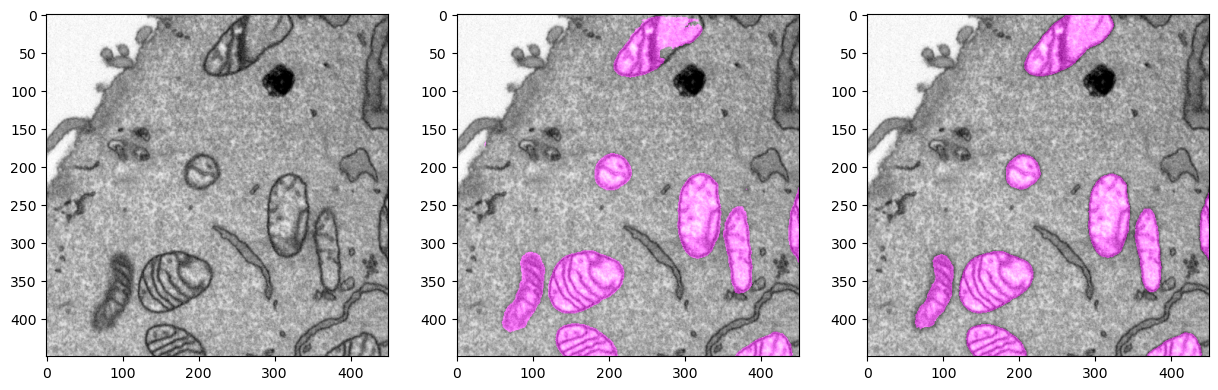

In [9]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(masked_ori_img)

plt.subplot(1, 3, 2)
plt.imshow(masked_pred_img)

plt.subplot(1, 3, 3)
plt.imshow(masked_gt_img)

In [10]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/fig1C/high_f1_score_#1"
os.makedirs(out_dir, exist_ok=True)

cv2.imwrite(os.path.join(out_dir, "raw_image.png"), denormalize_y(masked_ori_img))
cv2.imwrite(os.path.join(out_dir, "prediction.png"), denormalize_y(masked_pred_img))
cv2.imwrite(os.path.join(out_dir, "ground_truth.png"), denormalize_y(masked_gt_img))

True

## 2

In [11]:
ori_imgs , _ = load_X_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/013_f1_095/original/')
gt_imgs , _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/013_f1_095/ground_truth/', normalize=False)
pred_imgs, _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/013_f1_095/pred/', normalize=False)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [12]:
cropped_ori_imgs = ori_imgs[:, :450, :450]
cropped_gt_imgs = gt_imgs[:, :450, :450]
cropped_pred_imgs = pred_imgs[:, :450, :450]

In [13]:
section_Z = 41
masked_ori_img = make_mask_img(cropped_ori_imgs[section_Z], np.zeros_like(cropped_ori_imgs[section_Z]))
masked_pred_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_pred_imgs[section_Z])
masked_gt_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_gt_imgs[section_Z])

pred_f1_matrix = culc_F1(cropped_pred_imgs[section_Z], cropped_gt_imgs[section_Z])

Precision: 0.9, Recall: 1.0, F1: 0.95 
Precision: 0.8977857770708635, Recall: 0.9981385825305971, F1: 0.9453063023358308 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


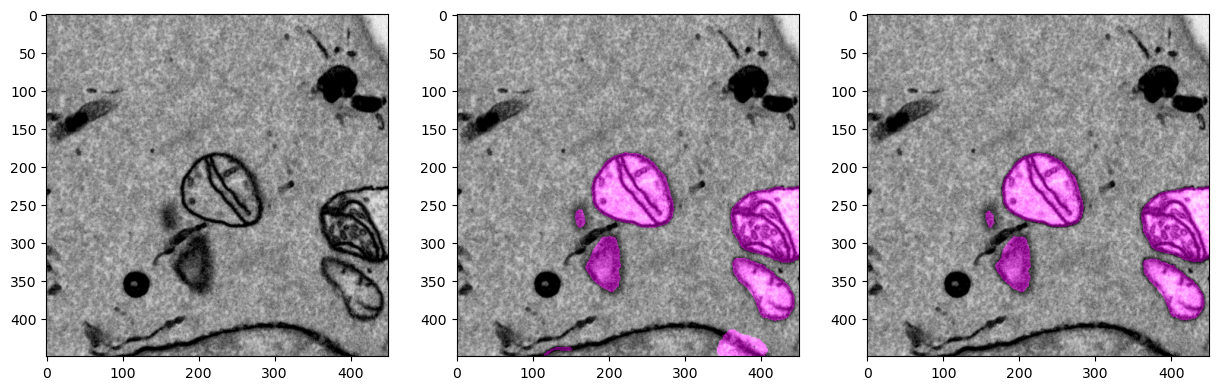

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(masked_ori_img)

plt.subplot(1, 3, 2)
plt.imshow(masked_pred_img)

plt.subplot(1, 3, 3)
plt.imshow(masked_gt_img)

In [15]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/fig1C/high_f1_score_#2"
os.makedirs(out_dir, exist_ok=True)

cv2.imwrite(os.path.join(out_dir, "raw_image.png"), denormalize_y(masked_ori_img))
cv2.imwrite(os.path.join(out_dir, "prediction.png"), denormalize_y(masked_pred_img))
cv2.imwrite(os.path.join(out_dir, "ground_truth.png"), denormalize_y(masked_gt_img))

True

# Low F1 Score

## 1

In [16]:
ori_imgs , _ = load_X_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/006_f1_088/original/')
gt_imgs , _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/006_f1_088/ground_truth/', normalize=False)
pred_imgs, _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/006_f1_088/pred/', normalize=False)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [17]:
cropped_ori_imgs = ori_imgs[:, :450, :450]
cropped_gt_imgs = gt_imgs[:, :450, :450]
cropped_pred_imgs = pred_imgs[:, :450, :450]

In [18]:
section_Z = 50
masked_ori_img = make_mask_img(cropped_ori_imgs[section_Z], np.zeros_like(cropped_ori_imgs[section_Z]))
masked_pred_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_pred_imgs[section_Z])
masked_gt_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_gt_imgs[section_Z])

pred_f1_matrix = culc_F1(cropped_pred_imgs[section_Z], cropped_gt_imgs[section_Z])

Precision: 0.94, Recall: 0.83, F1: 0.88 
Precision: 0.9395065003979836, Recall: 0.8325561346447745, F1: 0.8828038975339165 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


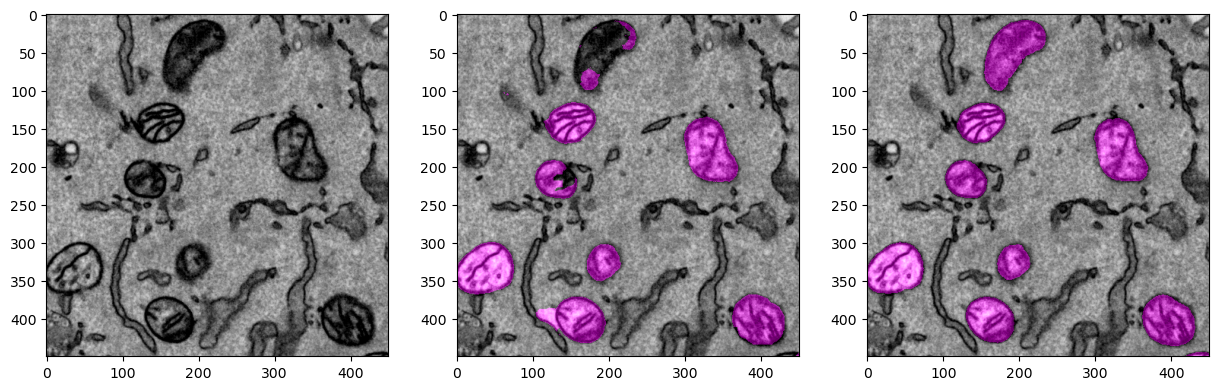

In [19]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(masked_ori_img)

plt.subplot(1, 3, 2)
plt.imshow(masked_pred_img)

plt.subplot(1, 3, 3)
plt.imshow(masked_gt_img)

In [20]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/fig1C/low_f1_score_#1"
os.makedirs(out_dir, exist_ok=True)

cv2.imwrite(os.path.join(out_dir, "raw_image.png"), denormalize_y(masked_ori_img))
cv2.imwrite(os.path.join(out_dir, "prediction.png"), denormalize_y(masked_pred_img))
cv2.imwrite(os.path.join(out_dir, "ground_truth.png"), denormalize_y(masked_gt_img))

True

## 2

In [21]:
ori_imgs , _ = load_X_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/007_f1_089/original/')
gt_imgs , _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/007_f1_089/ground_truth/', normalize=False)
pred_imgs, _ = load_Y_gray('Z:/paper_data/2021_cristae/data_110_crop_data_for_new_fig1_a/007_f1_089/pred/', normalize=False)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [22]:
cropped_ori_imgs = ori_imgs[:, :450, :450]
cropped_gt_imgs = gt_imgs[:, :450, :450]
cropped_pred_imgs = pred_imgs[:, :450, :450]

In [23]:
section_Z = 57
masked_ori_img = make_mask_img(cropped_ori_imgs[section_Z], np.zeros_like(cropped_ori_imgs[section_Z]))
masked_pred_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_pred_imgs[section_Z])
masked_gt_img = make_mask_img(cropped_ori_imgs[section_Z], cropped_gt_imgs[section_Z])

pred_f1_matrix = culc_F1(cropped_pred_imgs[section_Z], cropped_gt_imgs[section_Z])

Precision: 0.8, Recall: 1.0, F1: 0.89 
Precision: 0.7998300679728109, Recall: 0.9999375156210947, F1: 0.8887593024547373 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


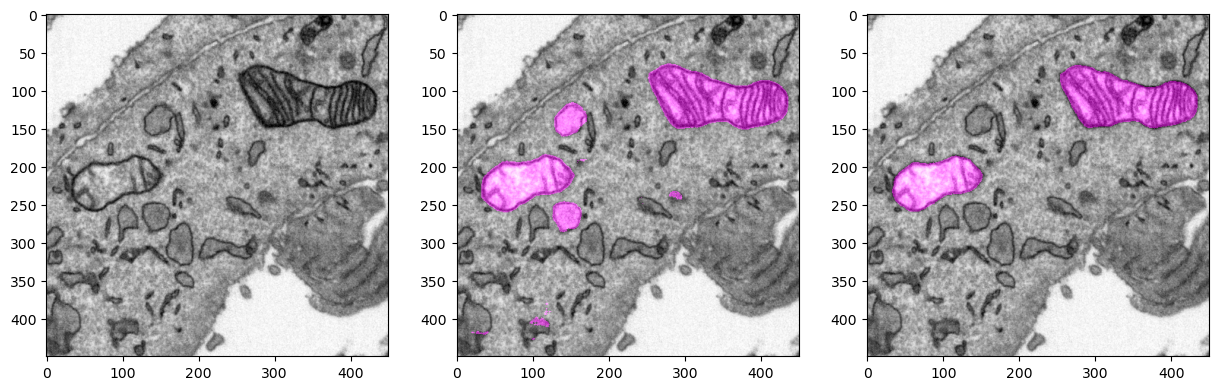

In [24]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(masked_ori_img)

plt.subplot(1, 3, 2)
plt.imshow(masked_pred_img)

plt.subplot(1, 3, 3)
plt.imshow(masked_gt_img)

In [25]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/fig1C/low_f1_score_#2"
os.makedirs(out_dir, exist_ok=True)

cv2.imwrite(os.path.join(out_dir, "raw_image.png"), denormalize_y(masked_ori_img))
cv2.imwrite(os.path.join(out_dir, "prediction.png"), denormalize_y(masked_pred_img))
cv2.imwrite(os.path.join(out_dir, "ground_truth.png"), denormalize_y(masked_gt_img))

True